In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from  sklearn.cluster import KMeans
from  scipy.stats import zscore 

In [3]:
data=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/Unsupervised ML resources-20230218T151316Z-001/Unsupervised ML resources/technical_support_data-2.csv')

In [4]:
data

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [5]:
data.shape

(23, 8)

In [6]:
# seprating the data 
data_1=data.iloc[:,1:]

In [7]:
# Scaling the data 
data_2=data_1.apply(zscore)

In [8]:
data_2

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


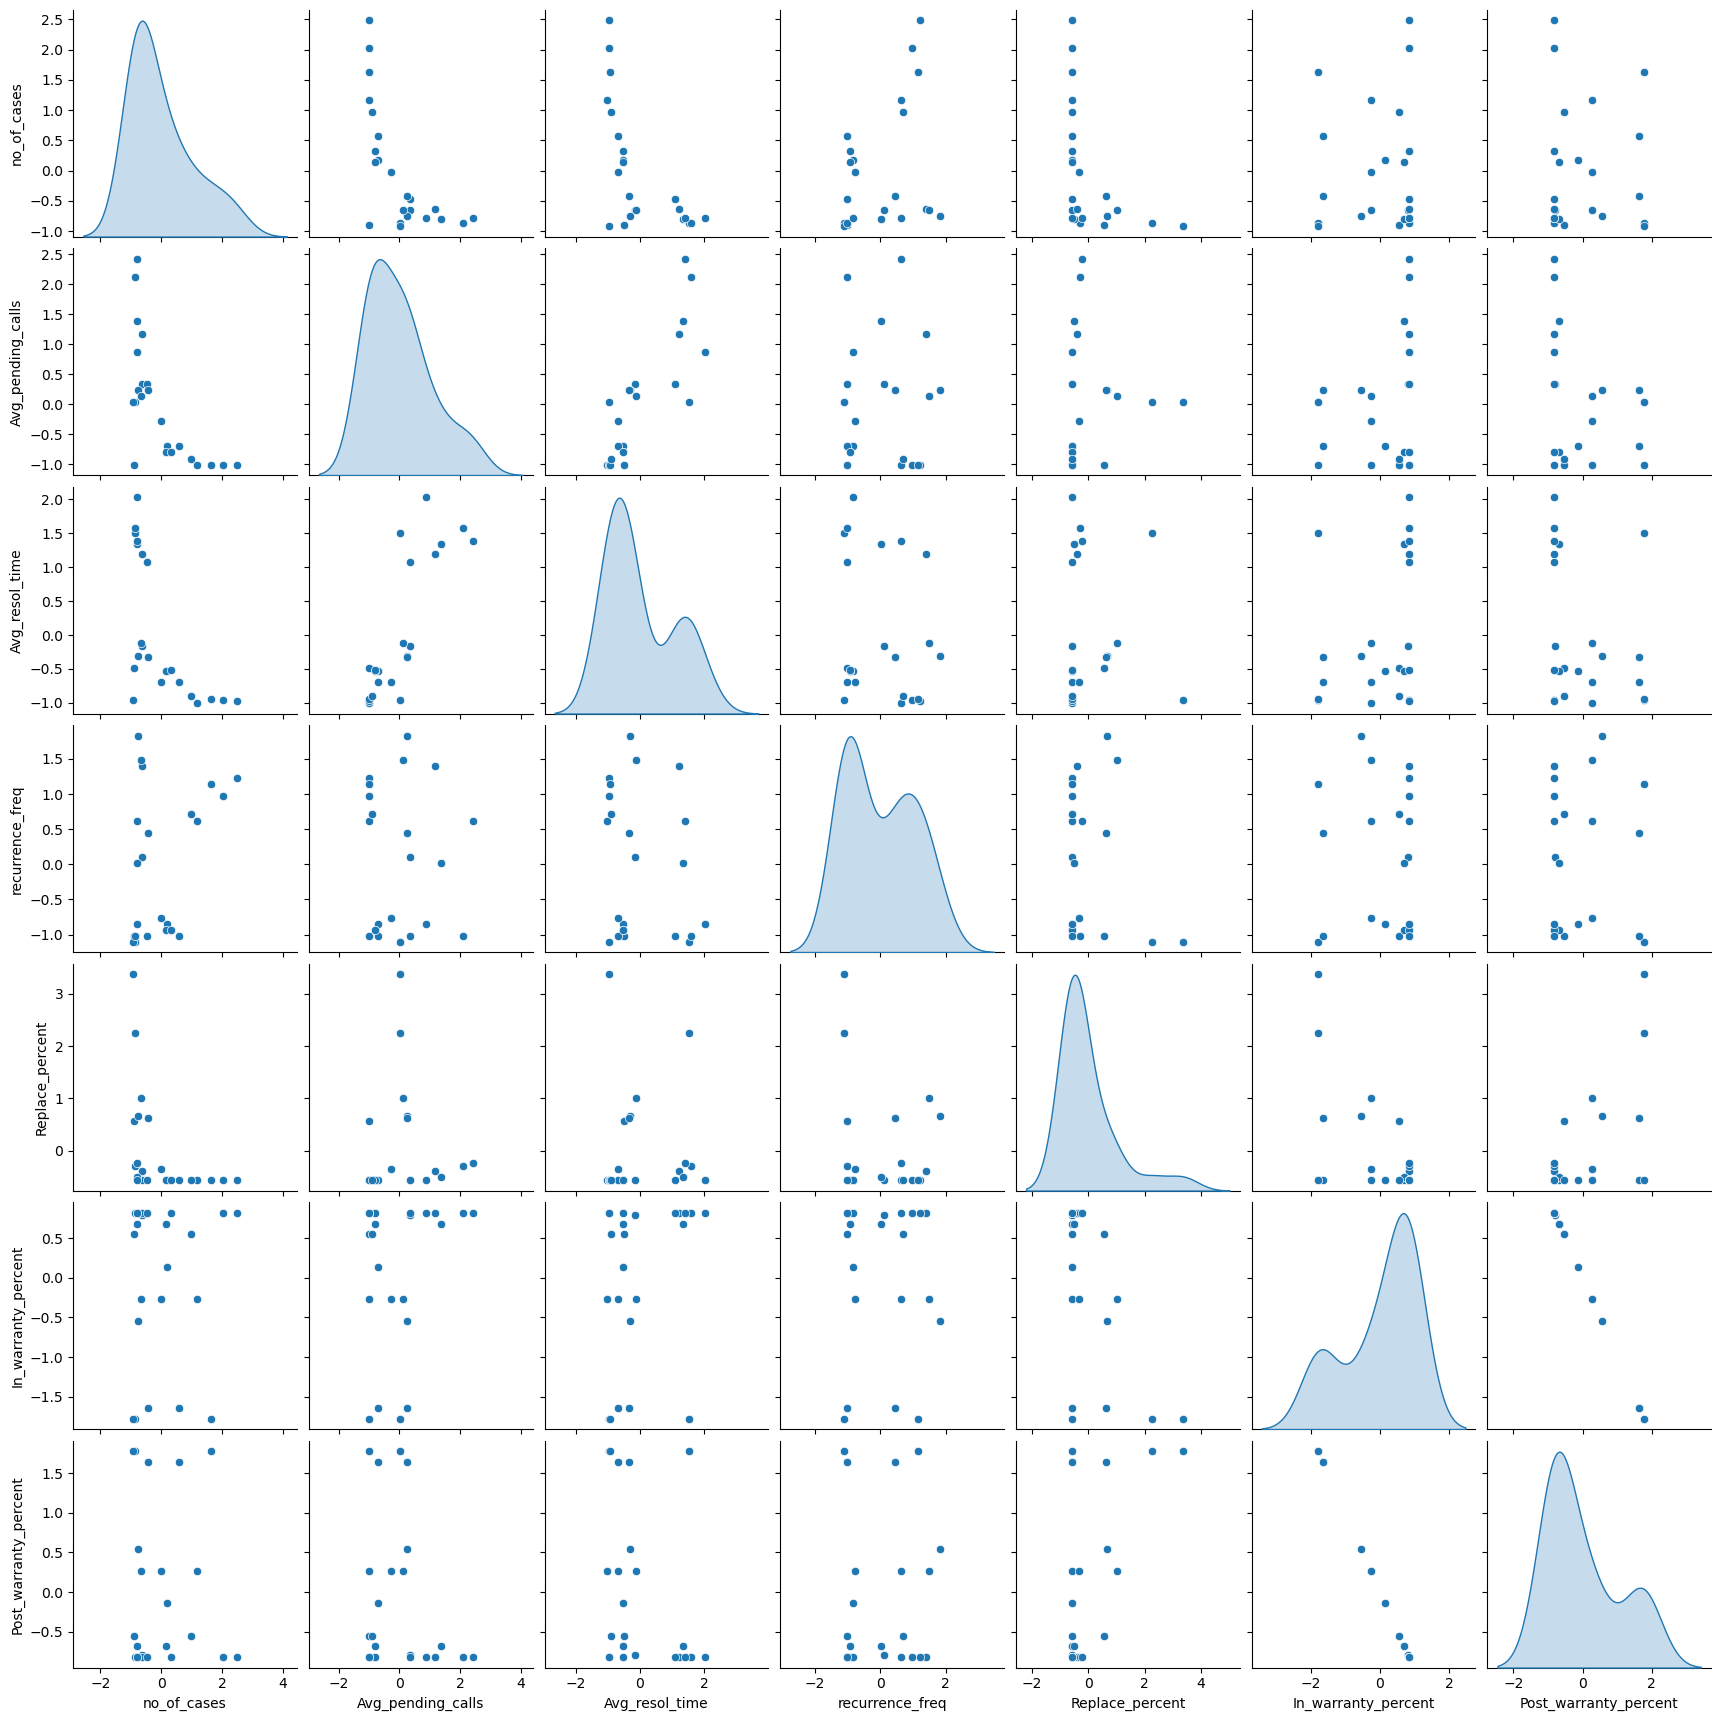

In [9]:
# Visualization the data into the pair plot
sb.pairplot(data_2,diag_kind='kde')

##### Grouping the data into similar clustring

###### 1- Elbow Method

In [10]:
from scipy.spatial.distance import cdist 
cluster =range(1,10)
meansDistortion=[]

for k in cluster:
    model=KMeans(n_clusters=k)
    model.fit(data_2)
    prediction=model.predict(data_2)
    meansDistortion.append(sum(np.min(cdist(data_2,model.cluster_centers_ ,'euclidean'),axis=1))/data_2.shape[0])


E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
meansDistortion

[2.5132186215720433,
 2.011069807948648,
 1.6368266300358518,
 1.4661262666709103,
 1.2297581575971248,
 1.0620842732423292,
 0.9899330409363389,
 0.8720947262439147,
 0.7828207014718981]

In [12]:
data_2.shape[0]  # Length of records

23

In [13]:
model.cluster_centers_

array([[ 1.40232549, -1.01335683, -0.9725057 ,  0.88066263, -0.56146347,
        -1.02538309,  1.02538309],
       [-0.72703088,  1.17169383,  1.50651552, -0.71389885, -0.47724395,
         0.78822978, -0.78822978],
       [-0.9215077 ,  0.02714349, -0.95513953, -1.10176516,  3.36878082,
        -1.77820353,  1.77820353],
       [-0.15239034, -0.54513169, -0.48914721, -0.72826427, -0.33687808,
         0.45288249, -0.45288249],
       [-0.61166328,  0.20056021, -0.25470387,  1.25416352,  0.76733341,
        -0.82006843,  0.82006843],
       [-0.7105498 ,  1.79599402,  1.2937799 ,  1.0099514 , -0.30880491,
         0.82244889, -0.82244889],
       [-0.86217579,  0.02714349,  1.51085707, -1.10176516,  2.24585388,
        -1.77820353,  1.77820353],
       [ 1.82753752, -0.97867349, -0.94356208,  0.96685514, -0.56146347,
         0.73119793, -0.73119793],
       [ 0.57497495, -0.70120673, -0.69464693, -1.01557265, -0.56146347,
        -1.64132708,  1.64132708]])

In [14]:
np.min(cdist(data_2,model.cluster_centers_ ,'euclidean'),axis=1)

array([0.6314653 , 0.        , 1.30330396, 0.        , 1.45400637,
       0.75011006, 1.01617748, 0.59881303, 1.11949738, 0.79711206,
       0.75011006, 0.        , 0.81635948, 0.63458354, 0.23896573,
       0.72122009, 1.11949738, 1.08684422, 1.02268269, 0.93509744,
       0.71592053, 0.85803127, 1.43507803])

In [15]:
sum(np.min(cdist(data_2,model.cluster_centers_ ,'euclidean'),axis=1))

18.004876133853656

In [16]:
import matplotlib.pyplot as plt
plt.plot(cluster,meansDistortion,'bx--')
plt.xlabel('k')
plt.ylabel('MeansDistrotion')
plt.title("Selecting K with the Elbow Mehtod")


Text(0.5, 1.0, 'Selecting K with the Elbow Mehtod')

##### Let Start with the First   k=3

In [17]:
data_2

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


In [18]:
final_model=KMeans(3)
final_model.fit(data_2)
prediction=final_model.predict(data_2)

# Adding the prediction in the old data which is not sacled and seprated 
data['clusters']=prediction
data

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,2
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,2
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,2
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,2
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0


In [19]:
data[data['clusters']==0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,clusters
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,0
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,0
